In [1]:
import pandas as pd
import os

In [2]:
os.chdir('S:\\Study\\Data Science\\Udemy\\Python\\Projects\\Advanced Visualization')
print(os.getcwd())
movies = pd.read_csv('Movie-Ratings.csv')

S:\Study\Data Science\Udemy\Python\Projects\Advanced Visualization


In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
       'BudgetMillions', 'Year']

In [10]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [18]:
#Convert to Category
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [21]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [22]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

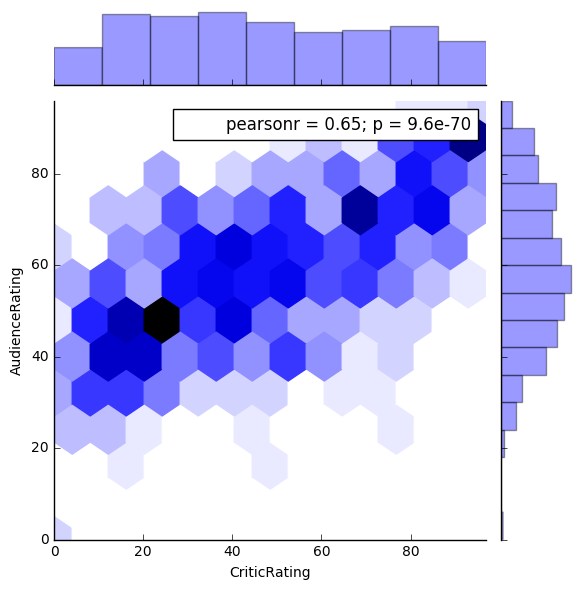

In [25]:
#Jointplots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex' )

---

TypeError: slice indices must be integers or None or have an __index__ method

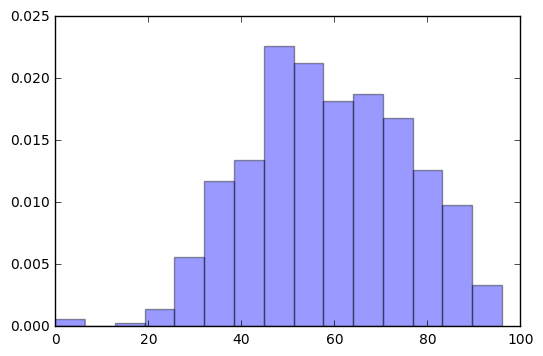

In [28]:
#Histograms
m1 = sns.distplot(movies.AudienceRating, bins=15)

TypeError: slice indices must be integers or None or have an __index__ method

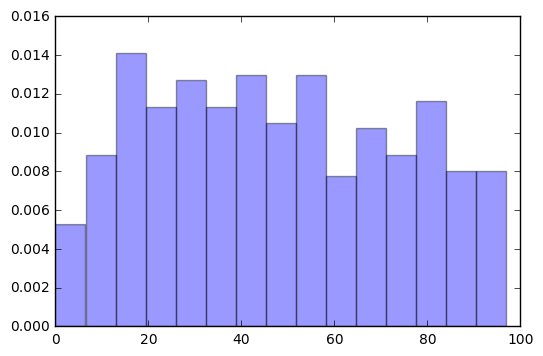

In [29]:
m1 = sns.distplot(movies.CriticRating, bins=15)

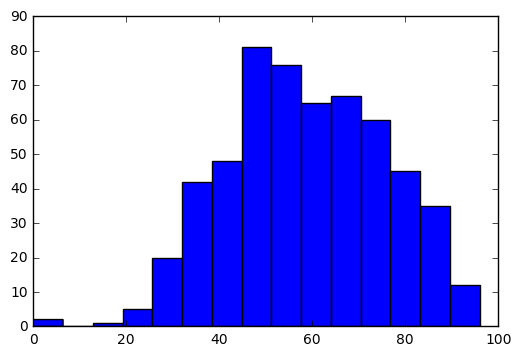

In [32]:
h1 = plt.hist(movies.AudienceRating, bins=15)

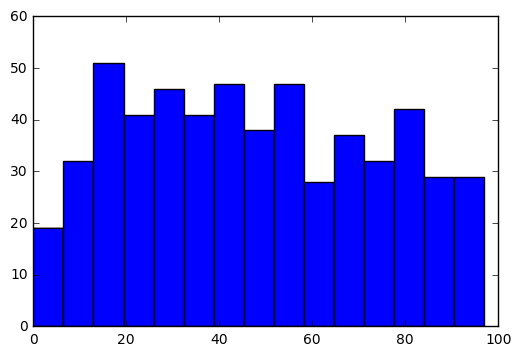

In [33]:
h1 = plt.hist(movies.CriticRating, bins=15)

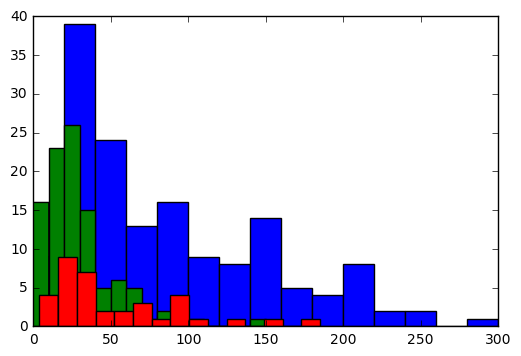

In [40]:
#Stacked Histograms
FilterA = movies.Genre == 'Action'
FilterD = movies.Genre == 'Drama'
FilterT = movies.Genre == 'Thriller'
plt.hist(movies[FilterA].BudgetMillions, bins=15)
plt.hist(movies[FilterD].BudgetMillions, bins=15)
plt.hist(movies[FilterT].BudgetMillions, bins=15)
plt.show()

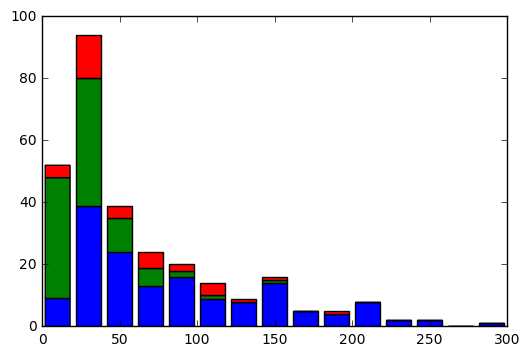

In [42]:
FilterA = movies.Genre == 'Action'
FilterD = movies.Genre == 'Drama'
FilterT = movies.Genre == 'Thriller'
plt.hist([movies[FilterA].BudgetMillions, \
          movies[FilterD].BudgetMillions, \
          movies[FilterT].BudgetMillions], \
         bins=15, stacked=True)
plt.show()

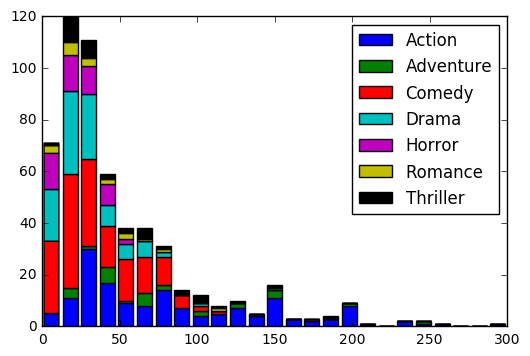

In [52]:
ListGenre = []
ListLegend = []
for gen in movies.Genre.cat.categories:
    F = movies.Genre == gen
    ListGenre.append(movies[F].BudgetMillions)
    ListLegend.append(gen)
plt.hist(ListGenre,bins=25,stacked=True,label=ListLegend)
plt.legend()
plt.show()

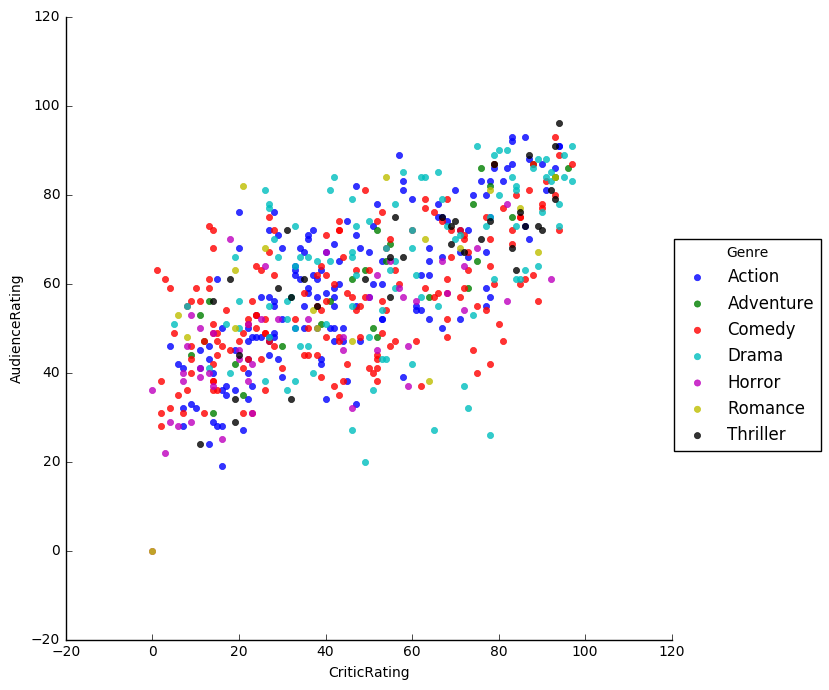

In [57]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

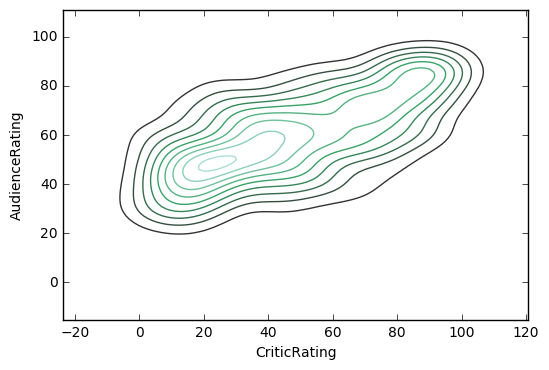

In [58]:
#Kernal Density Estimate
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

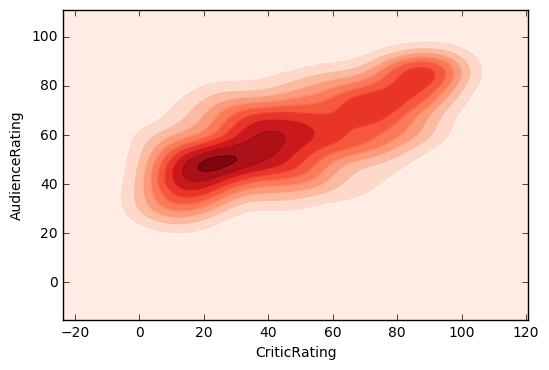

In [65]:
ked = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shadelowest=False, cmap = 'Reds')
ked_line = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = 'Reds')


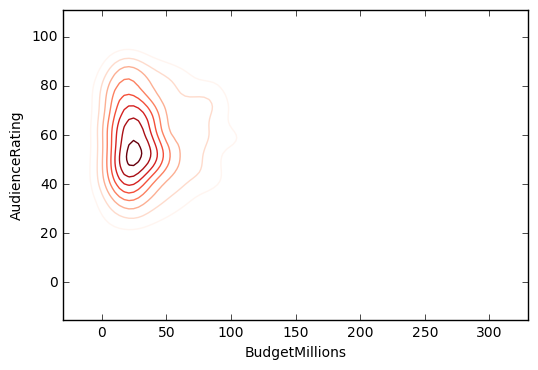

In [68]:
ked_line = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap = 'Reds')


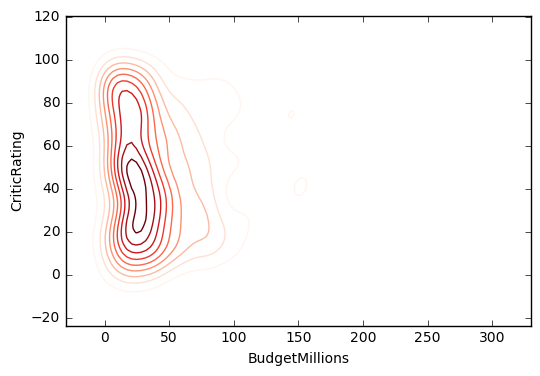

In [69]:
ked_line = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap = 'Reds')


[(-20, 160)]

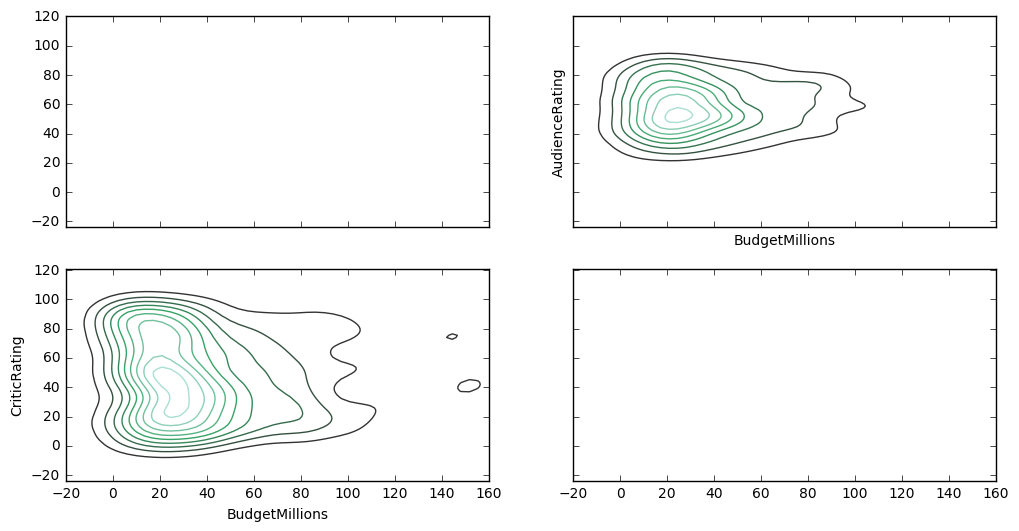

In [73]:
#Subplots
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,1])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,0])
k1.set(xlim=(-20,160))

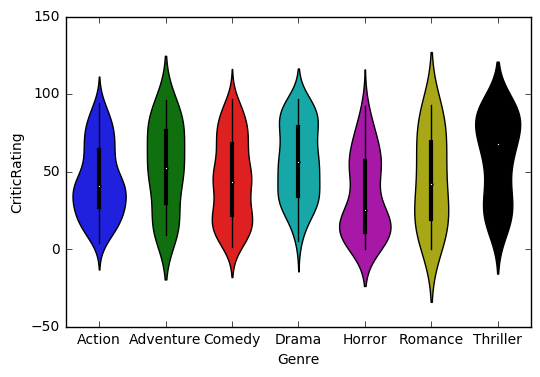

In [76]:
#Violin Plots
v = sns.violinplot(data=movies, x='Genre', y='CriticRating')

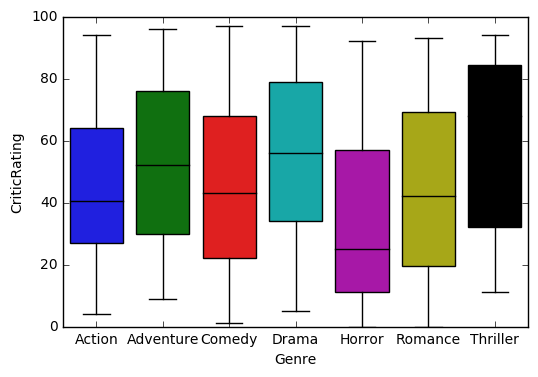

In [77]:
b = sns.boxplot(data=movies, x='Genre', y='CriticRating')

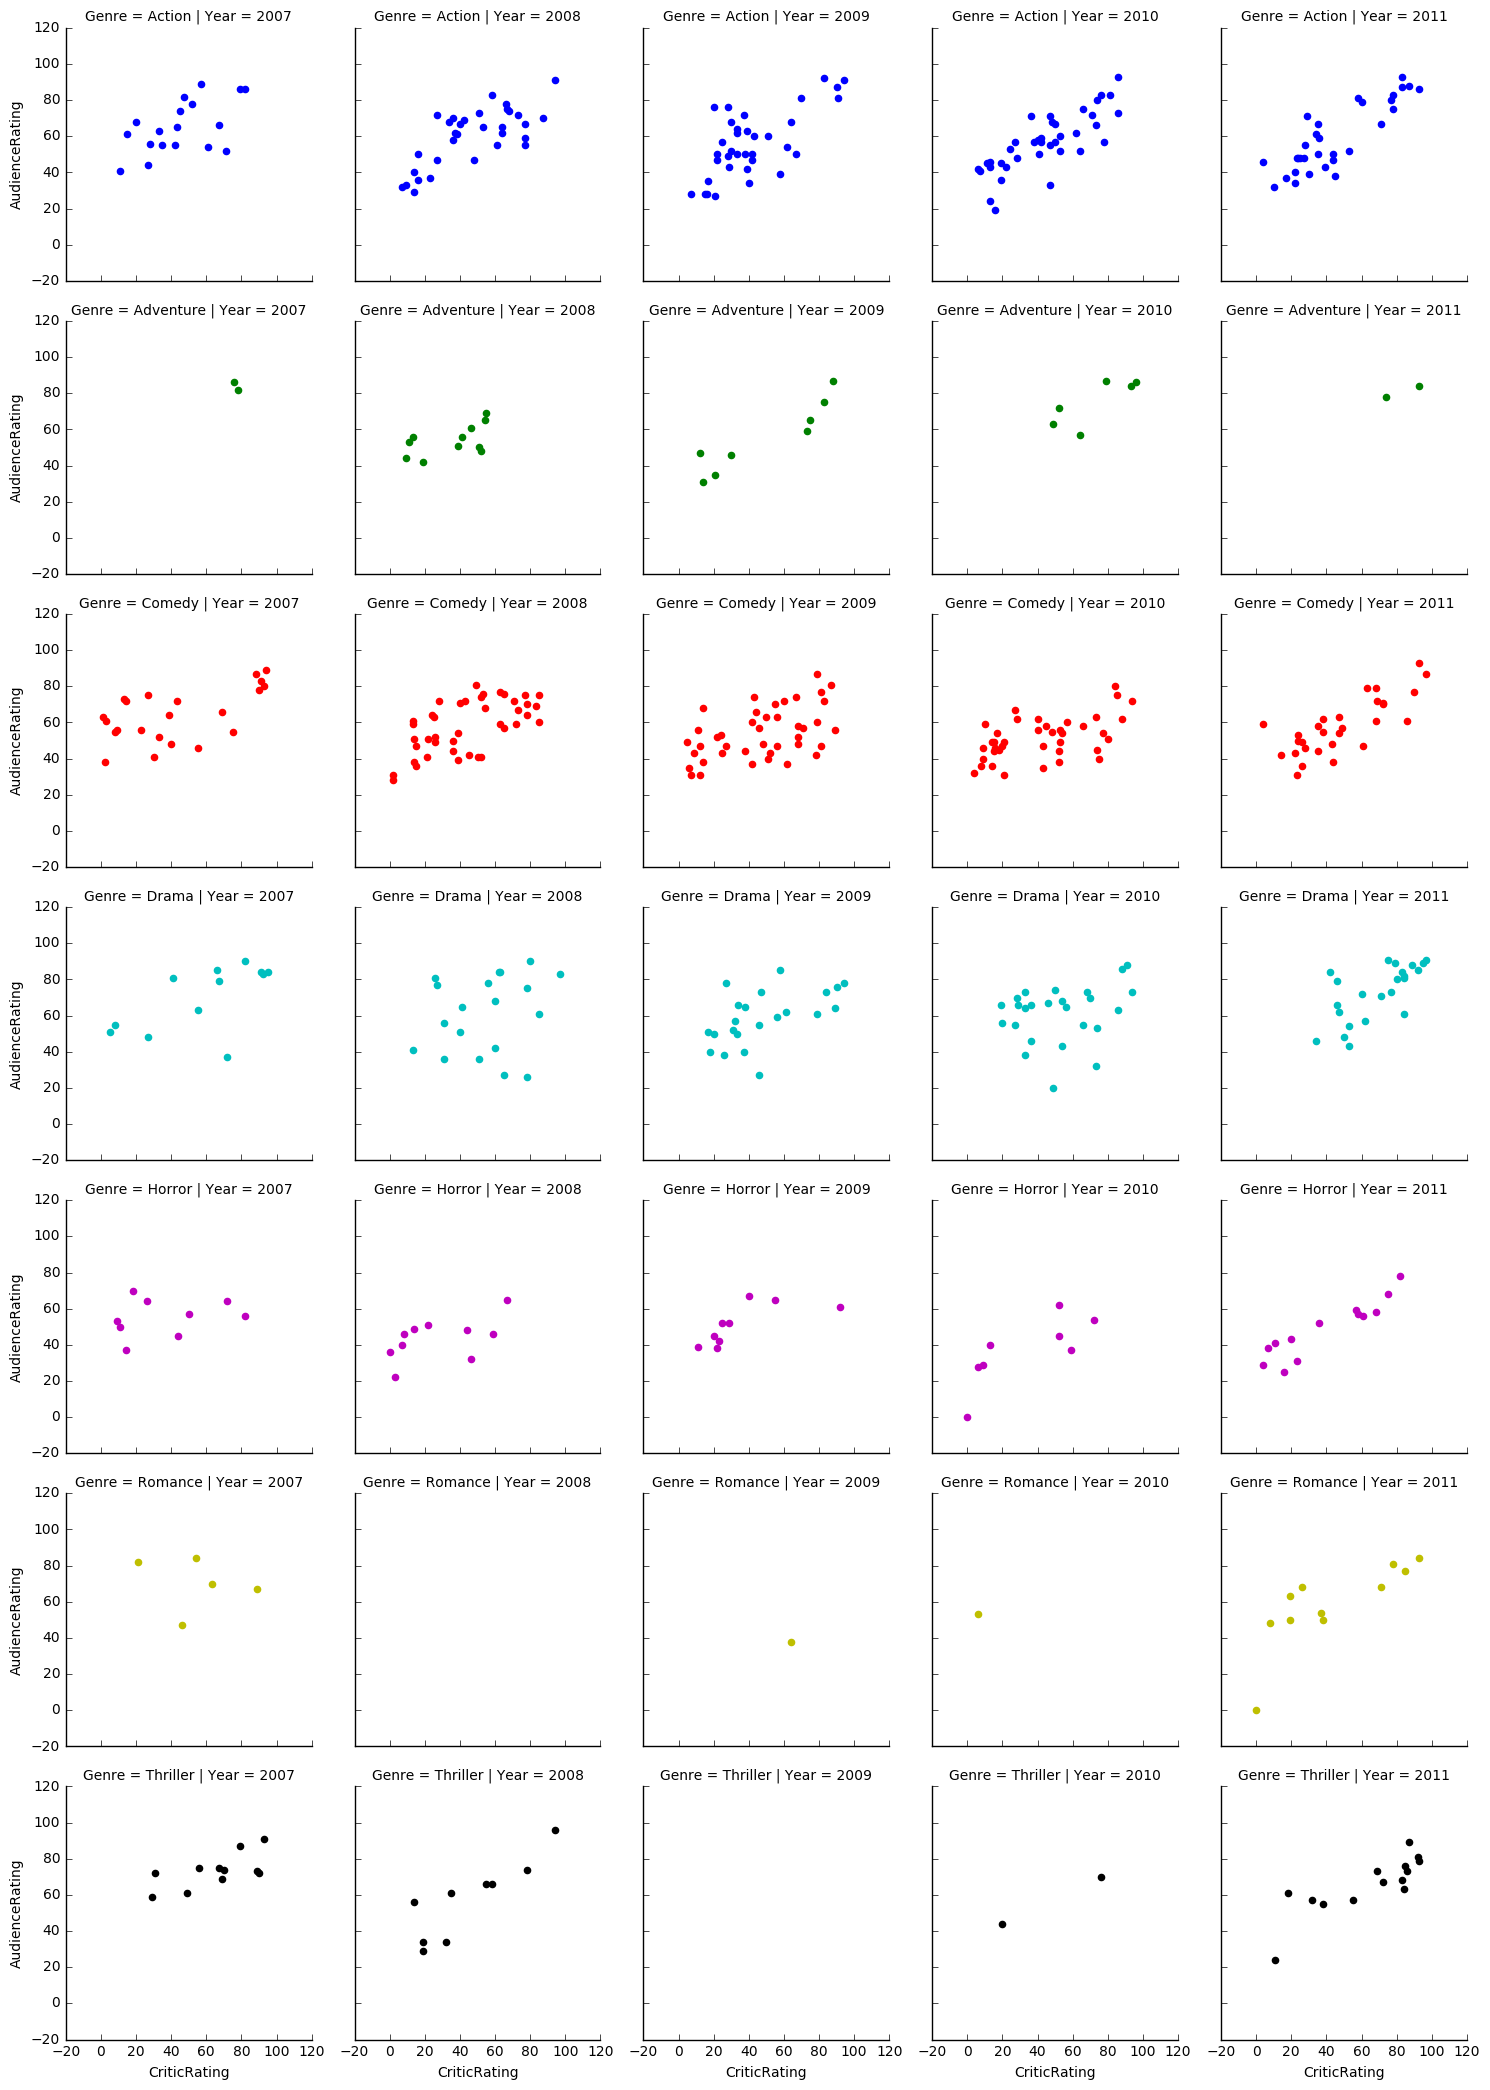

In [83]:
#Facet Grid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

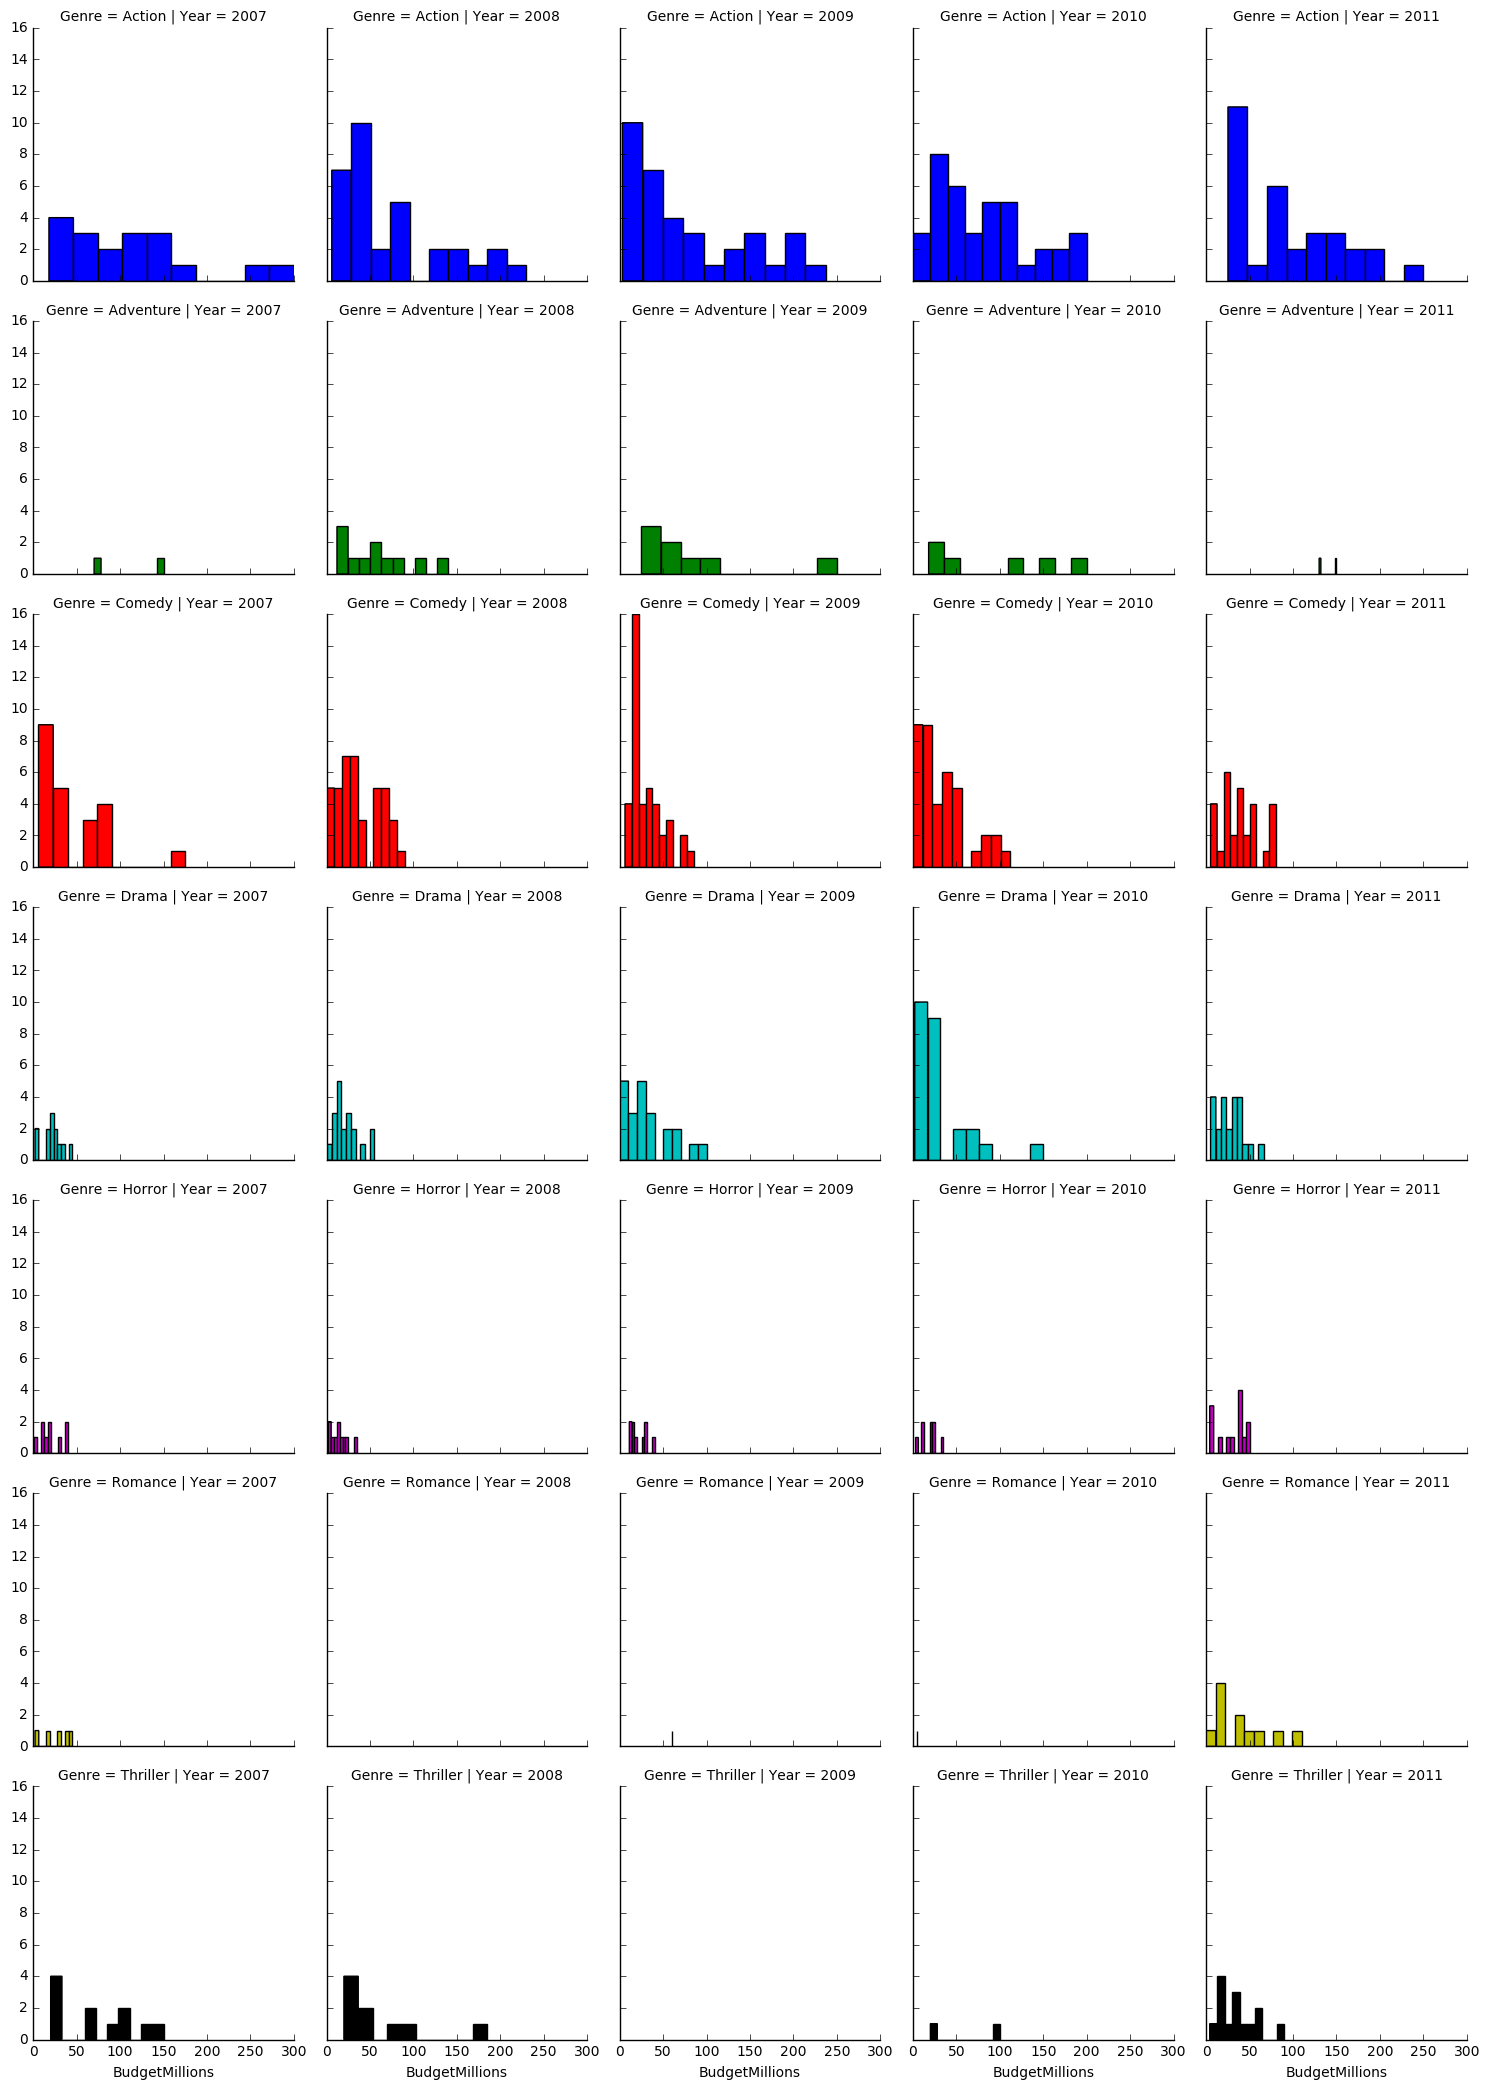

In [84]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

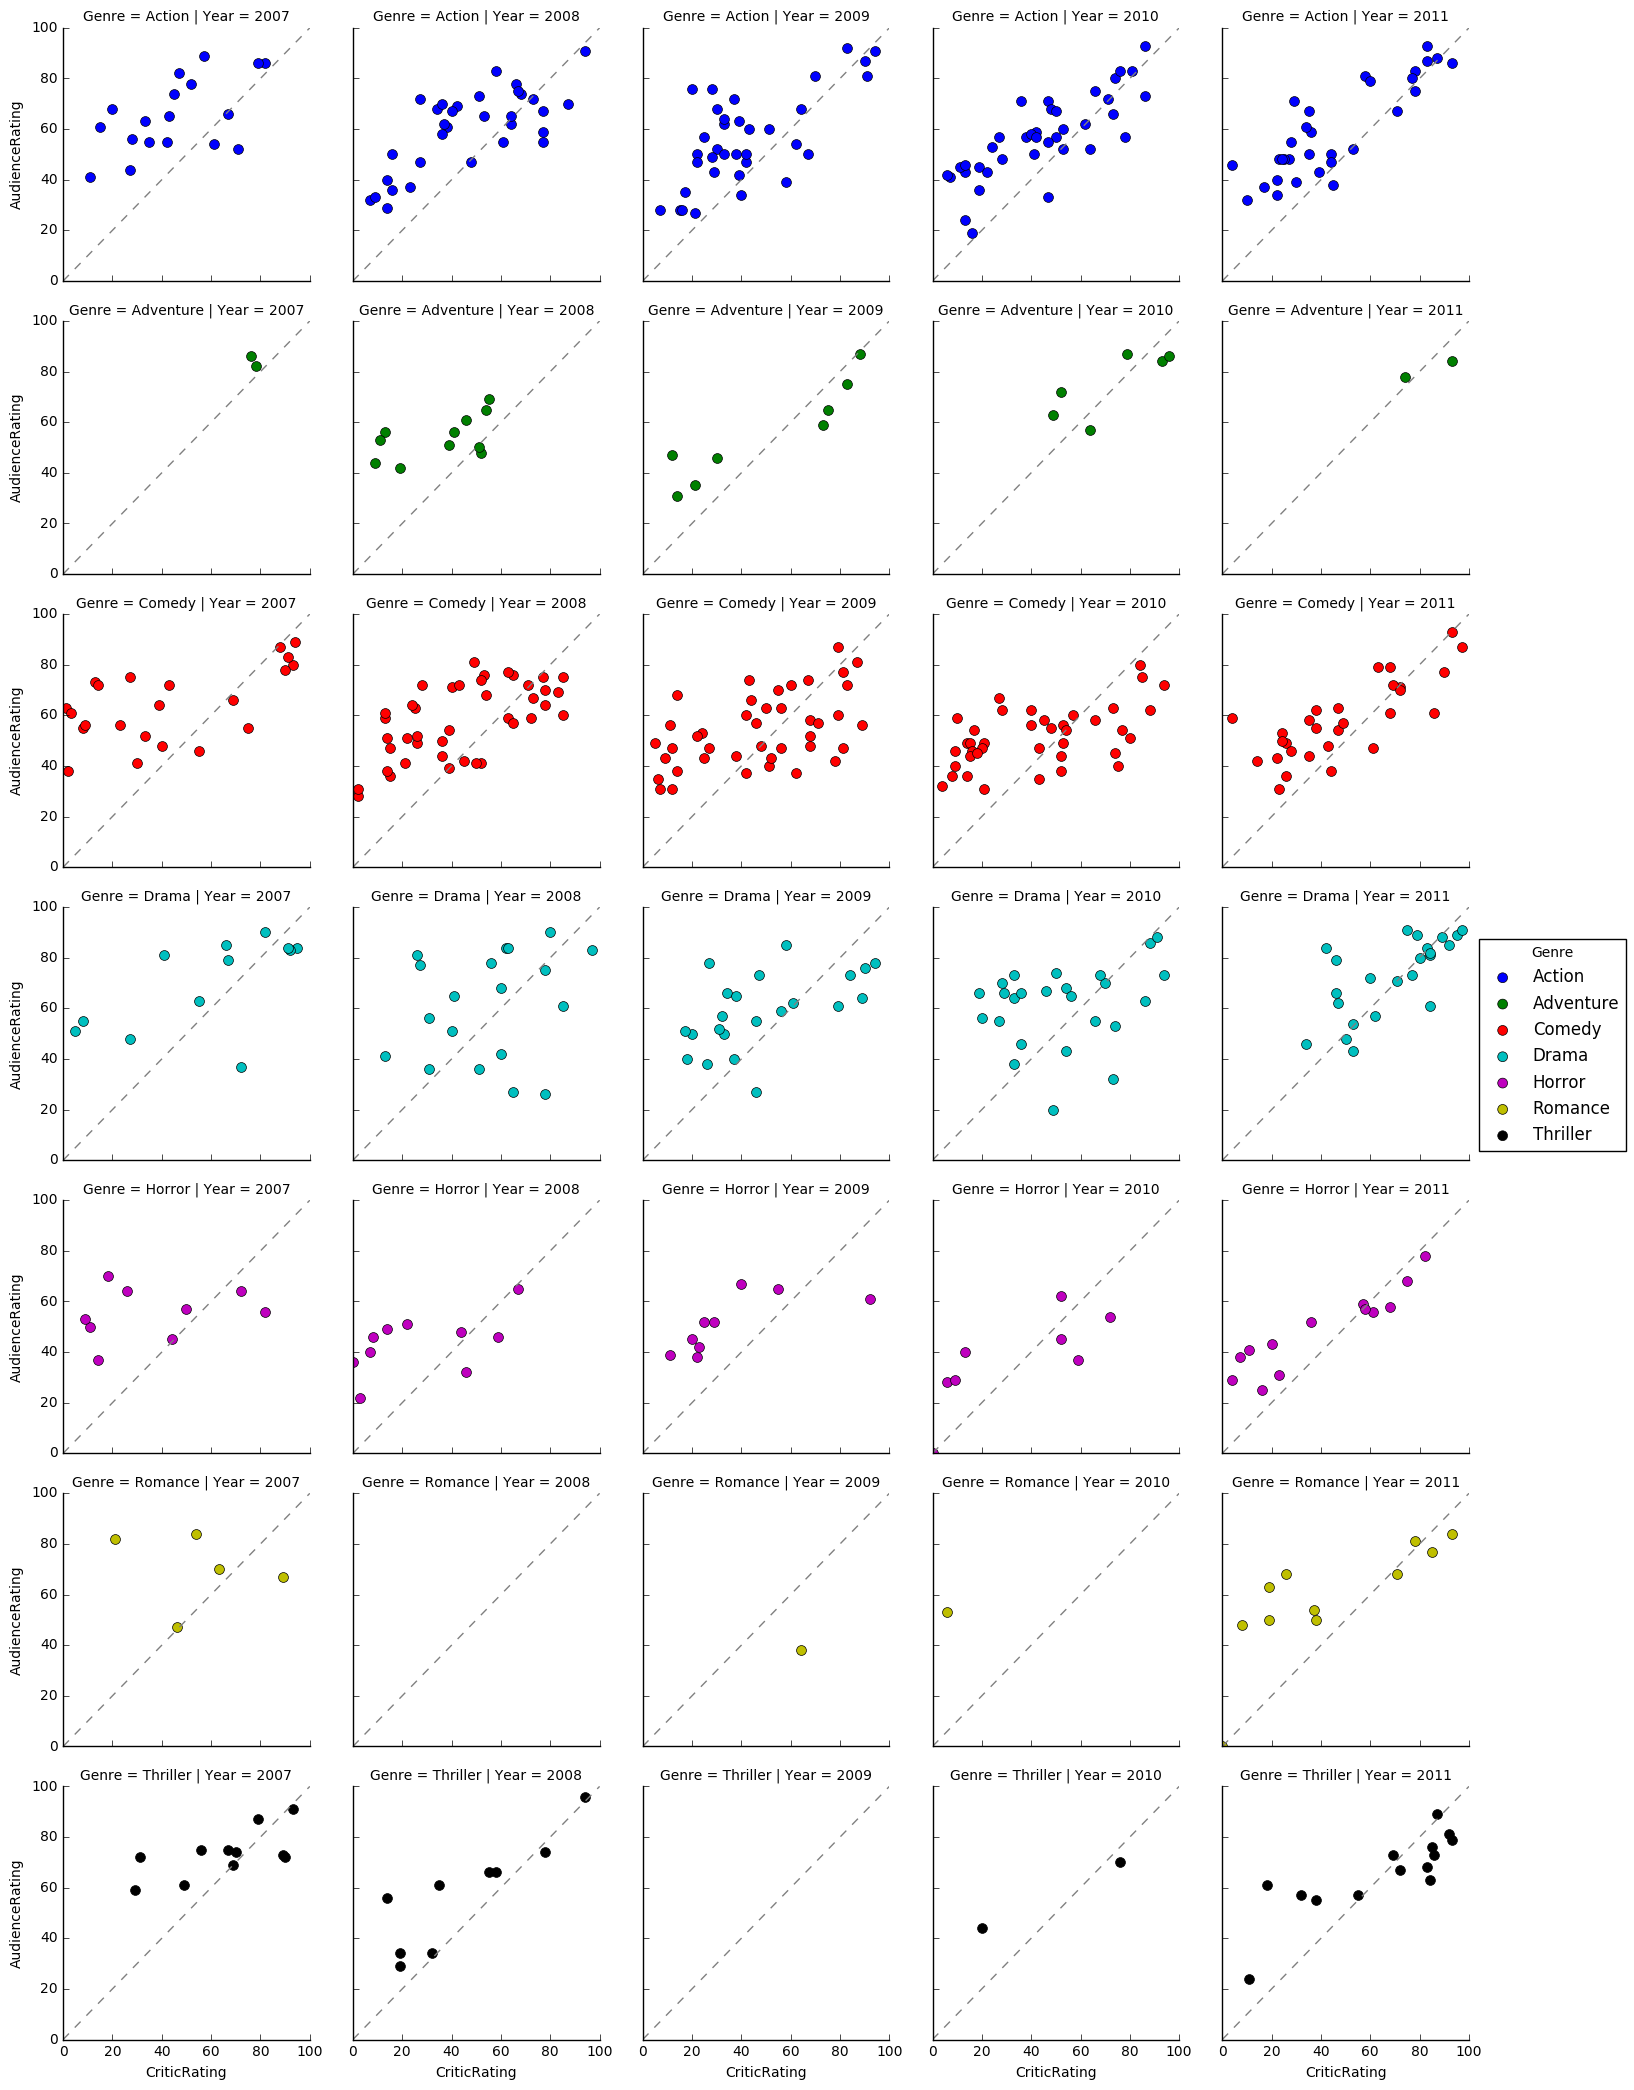

In [88]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

In [ ]:
#Dashboards